In [3]:
# raw data load
# often use library load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("bigcontest.csv")

df = data.copy() #원본 둔 채 copydata 생성

In [4]:
cthall = df[ df['place'] == '콘서트홀' ]
cthall # concerthall 에서 한 공연만 가지고 dataframe 생성

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [4]:
cthall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096968 entries, 0 to 1920864
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   age                484517 non-null   float64
 1   gender             484867 non-null   object 
 2   membership_type_1  484867 non-null   object 
 3   membership_type_2  389737 non-null   object 
 4   membership_type_3  140468 non-null   object 
 5   membership_type_4  25160 non-null    object 
 6   membership_type_5  1110 non-null     object 
 7   membership_type_6  0 non-null        float64
 8   tran_date          1096968 non-null  int64  
 9   tran_time          1096968 non-null  int64  
 10  play_date          1096968 non-null  int64  
 11  play_st_time       1096968 non-null  int64  
 12  seat               1096968 non-null  object 
 13  price              1096968 non-null  int64  
 14  ticket_cancel      1096968 non-null  int64  
 15  discount_type      1096968 non-null  

In [5]:
cthall['performance_code']

0           302
4           897
5           528
6            44
7           827
           ... 
1920853     887
1920855    2825
1920856      77
1920858     850
1920864     313
Name: performance_code, Length: 1096968, dtype: int64

-------------------------------
# date preprocessing
not Sort Value

### 예매일자 전처리

In [6]:
df_time = cthall[ ['member_yn' ,'tran_date', 'pre_open_date', 'open_date']]
df_time

,member_yn,tran_date,pre_open_date,open_date
0,Y,20220114,20220114.0,20220115.0
4,Y,20220206,20220109.0,20220110.0
5,Y,20181124,20181119.0,20181119.0
6,N,20191020,NaN,20191023.0
7,N,20190613,20190602.0,20190602.0
...,...,...,...,...
1920853,Y,20210618,20210618.0,20210620.0
1920855,Y,20230522,20230505.0,20230507.0
1920856,N,20201009,NaN,20200920.0
1920858,N,20200726,20200719.0,20200720.0


In [7]:
df_time['date_diff'] = np.where( df_time['tran_date'] == df_time['pre_open_date'] , 0 , df_time['tran_date'] - df_time['pre_open_date'])
df_time['date_diff']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10664\2376183952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['date_diff'] = np.where( df_time['tran_date'] == df_time['pre_open_date'] , 0 , df_time['tran_date'] - df_time['pre_open_date'])


0           0.0
4          97.0
5           5.0
6           NaN
7          11.0
           ... 
1920853     0.0
1920855    17.0
1920856     NaN
1920858     7.0
1920864     NaN
Name: date_diff, Length: 1096968, dtype: float64

Sort value

In [8]:
df_time.sort_values(by='pre_open_date', ascending = 1)

,member_yn,tran_date,pre_open_date,open_date,date_diff
1209591,N,20181105,20181028.0,20181029.0,77.0
1143061,N,20181116,20181028.0,20181029.0,88.0
1691922,N,20181112,20181028.0,20181029.0,84.0
1094977,N,20181112,20181028.0,20181029.0,84.0
1592865,N,20181116,20181028.0,20181029.0,88.0
...,...,...,...,...,...
1920843,Y,20181223,NaN,20181202.0,NaN
1920845,N,20220602,NaN,20220521.0,NaN
1920846,N,20191005,NaN,20190921.0,NaN
1920856,N,20201009,NaN,20200920.0,NaN


-------------

 멤버십 유무 고려해서 EDA 한번 더 해보기


In [9]:
df_time

,member_yn,tran_date,pre_open_date,open_date,date_diff
0,Y,20220114,20220114.0,20220115.0,0.0
4,Y,20220206,20220109.0,20220110.0,97.0
5,Y,20181124,20181119.0,20181119.0,5.0
6,N,20191020,NaN,20191023.0,NaN
7,N,20190613,20190602.0,20190602.0,11.0
...,...,...,...,...,...
1920853,Y,20210618,20210618.0,20210620.0,0.0
1920855,Y,20230522,20230505.0,20230507.0,17.0
1920856,N,20201009,NaN,20200920.0,NaN
1920858,N,20200726,20200719.0,20200720.0,7.0


-----------

In [10]:
df_time['date_diff'].fillna( (df_time['tran_date'] - df_time['open_date'] ), inplace=True )
df_time.sort_values(by='open_date', ascending = 1)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10664\1224151286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['date_diff'].fillna( (df_time['tran_date'] - df_time['open_date'] ), inplace=True )


,member_yn,tran_date,pre_open_date,open_date,date_diff
699834,N,20181123,NaN,20181029.0,94.0
1102301,N,20181112,20181028.0,20181029.0,84.0
396353,N,20181118,NaN,20181029.0,89.0
567206,N,20181124,NaN,20181029.0,95.0
1911926,N,20181204,NaN,20181029.0,175.0
...,...,...,...,...,...
45353,Y,20230526,20230526.0,20230527.0,0.0
1415571,N,20230527,20230526.0,20230527.0,1.0
45374,Y,20230526,20230526.0,20230527.0,0.0
776744,Y,20230527,20230526.0,20230527.0,1.0


In [11]:
df_time

,member_yn,tran_date,pre_open_date,open_date,date_diff
0,Y,20220114,20220114.0,20220115.0,0.0
4,Y,20220206,20220109.0,20220110.0,97.0
5,Y,20181124,20181119.0,20181119.0,5.0
6,N,20191020,NaN,20191023.0,-3.0
7,N,20190613,20190602.0,20190602.0,11.0
...,...,...,...,...,...
1920853,Y,20210618,20210618.0,20210620.0,0.0
1920855,Y,20230522,20230505.0,20230507.0,17.0
1920856,N,20201009,NaN,20200920.0,89.0
1920858,N,20200726,20200719.0,20200720.0,7.0


In [12]:
df_time_pre = df_time.dropna().query(" date_diff == 0 ") #멤버십이 아닌데 선예매? -> 카드사혜택??
df_time_pre

,member_yn,tran_date,pre_open_date,open_date,date_diff
0,Y,20220114,20220114.0,20220115.0,0.0
18,Y,20191220,20191220.0,20191223.0,0.0
58,Y,20230203,20230203.0,20230204.0,0.0
84,N,20190405,20190405.0,20190405.0,0.0
138,Y,20230415,20230415.0,20230416.0,0.0
...,...,...,...,...,...
1920774,Y,20221118,20221118.0,20221119.0,0.0
1920821,Y,20181209,20181209.0,20181210.0,0.0
1920836,Y,20210917,20210917.0,20210918.0,0.0
1920842,Y,20220410,20220410.0,20220411.0,0.0


In [13]:
df_time_pre.query(" member_yn == 'N' ")

,member_yn,tran_date,pre_open_date,open_date,date_diff
84,N,20190405,20190405.0,20190405.0,0.0
501,N,20210730,20210730.0,20210731.0,0.0
1164,N,20221021,20221021.0,20221021.0,0.0
1398,N,20190819,20190819.0,20190819.0,0.0
1696,N,20190819,20190819.0,20190819.0,0.0
...,...,...,...,...,...
1920318,N,20181210,20181210.0,20181210.0,0.0
1920577,N,20200103,20200103.0,20200105.0,0.0
1920686,N,20190819,20190819.0,20190819.0,0.0
1920723,N,20200103,20200103.0,20200105.0,0.0


In [14]:
df_time.query(" member_yn == 'Y' ")

,member_yn,tran_date,pre_open_date,open_date,date_diff
0,Y,20220114,20220114.0,20220115.0,0.0
4,Y,20220206,20220109.0,20220110.0,97.0
5,Y,20181124,20181119.0,20181119.0,5.0
11,Y,20191005,NaN,20191005.0,0.0
15,Y,20221030,20221105.0,20221030.0,-75.0
...,...,...,...,...,...
1920843,Y,20181223,NaN,20181202.0,21.0
1920849,Y,20230516,20230317.0,20230318.0,199.0
1920853,Y,20210618,20210618.0,20210620.0,0.0
1920855,Y,20230522,20230505.0,20230507.0,17.0


In [15]:
df_time.query(" member_yn == 'N' ")

,member_yn,tran_date,pre_open_date,open_date,date_diff
6,N,20191020,NaN,20191023.0,-3.0
7,N,20190613,20190602.0,20190602.0,11.0
9,N,20190703,NaN,20190413.0,290.0
13,N,20220624,20220430.0,20220430.0,194.0
17,N,20200511,20200403.0,20200406.0,108.0
...,...,...,...,...,...
1920847,N,20191007,20191025.0,20191025.0,-18.0
1920850,N,20190929,20190906.0,20190906.0,23.0
1920852,N,20190503,20190519.0,20190519.0,-16.0
1920856,N,20201009,NaN,20200920.0,89.0


---------------------------
### 공연날짜별 분류

In [16]:
import datetime

get_days_list = []

def get_days(yyyy, mm, dd):
    days = ['월','화','수','목','금','토','일']
    get_days_list.append( days[ datetime.date(yyyy,mm,dd).weekday() ] )

def get_df_date_info():
    for i in range(len(df_date)):
        year = int(str(df_date[i])[0:4])
        month = int(str(df_date[i])[4:6])
        day = int(str(df_date[i])[6:8])
        get_days(year, month, day)


In [17]:
df_date = cthall['play_date']
df_date

0          20220204
4          20220302
5          20190323
6          20191109
7          20190723
             ...   
1920853    20210704
1920855    20230613
1920856    20201020
1920858    20200818
1920864    20230408
Name: play_date, Length: 1096968, dtype: int64

- 코로나 시기 고려 , 정책 시행 ex) 거리두기 단계 고려
- 

In [18]:
df_date.sort_values()

946623     20181125
719896     20181125
661404     20181125
1611745    20181125
1400327    20181125
             ...   
1728428    20230707
1353267    20230707
1272085    20230707
749562     20230707
1608415    20230707
Name: play_date, Length: 1096968, dtype: int64

In [19]:
df_date = df_date.sort_values().reset_index(drop=True)
str(df_date[0])[0:4]

'2018'

In [20]:
df_date

0          20181125
1          20181125
2          20181125
3          20181125
4          20181125
             ...   
1096963    20230707
1096964    20230707
1096965    20230707
1096966    20230707
1096967    20230707
Name: play_date, Length: 1096968, dtype: int64

In [21]:
len(df_date.values)

1096968

In [22]:
get_df_date_info()

In [23]:
len(get_days_list)

1096968

In [24]:
df_days = pd.DataFrame( { 'play_date' : df_date.values ,
                'days' : get_days_list
})

df_days

,play_date,days
0,20181125,일
1,20181125,일
2,20181125,일
3,20181125,일
4,20181125,일
...,...,...
1096963,20230707,금
1096964,20230707,금
1096965,20230707,금
1096966,20230707,금


-----------------

### 공휴일 , 대체공휴일 전처리

In [25]:
df_days

,play_date,days
0,20181125,일
1,20181125,일
2,20181125,일
3,20181125,일
4,20181125,일
...,...,...
1096963,20230707,금
1096964,20230707,금
1096965,20230707,금
1096966,20230707,금


In [196]:
df_days['play_date'] = df_days['play_date'].astype('str')

In [ ]:
def change_holiday(list):

In [187]:
holiday_list_2018[0] in df_days['play_date'][0]

True

In [190]:
if holiday_list_2018[0] == df_days['play_date'][0]:
    df_days['days'][0] = 'holiday'

df_days


,play_date,days
0,20181125,holiday
1,20181125,일
2,20181125,일
3,20181125,일
4,20181125,일
...,...,...
1096963,20230707,금
1096964,20230707,금
1096965,20230707,금
1096966,20230707,금


20181125

In [201]:
def change_holiday(list):
    for i in range(len(list)):    
        for j in range(len(df_days['play_date'])):
            if list[i] == df_days['play_date'][j]:
                df_days['days'][j] = 'holiday'        
            else:
                pass

In [ ]:
change_holiday(holiday_list_2018)

In [ ]:
holiday_list_2018 = [ '20180501' , '20180507', '20180521' , '20180522', '20180606', '20180613', '20180815', '20180924',\
                     '20180925','20180926', '20181003', '20181009', '20181225']

holiday_list_2018

In [202]:
df_days

,play_date,days
0,20181125,holiday
1,20181125,holiday
2,20181125,holiday
3,20181125,holiday
4,20181125,holiday
...,...,...
1096963,20230707,금
1096964,20230707,금
1096965,20230707,금
1096966,20230707,금


--------------

``` 사회적 거리두기 정보 ```
2020년

2020.3.22. ~ 2022.4.18. 사회적거리두기 시행

- 첫 거리두기 지침

![screensh](https://imgnews.pstatic.net/image/001/2020/05/03/GYH2020050300110004400_P2_20200503201902554.jpg?type=w647)

- 20.8.16 수도권 사회적거리두기 2단계시행 ~ 8.30 (http://www.hani.co.kr/arti/society/health/959718.html) (http://www.hani.co.kr/arti/society/health/959718.html)
- 20.8.30 2.5단계 ~ 9.13 (https://www.yna.co.kr/view/AKR20200913037451001)
- 20.9.14 2단계 ~ 9.27 (https://www.yna.co.kr/view/AKR20200913037451001)
- 20.10.12~ 1단계로 하향 (https://www.donga.com/news/Society/article/all/20201012/103361491/2)



- 2020년 11월 1일 5단계체제로 변경 (https://www.donga.com/news/Society/article/all/20201101/103738185/1)

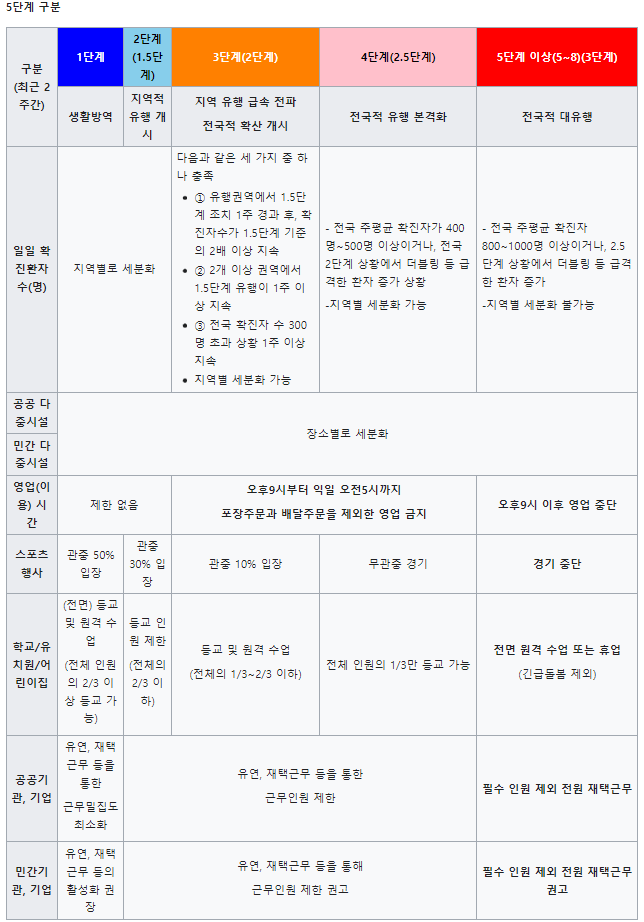



- 20.11.24 ~ 12.7 수도권 2단계 (https://www.donga.com/news/Society/article/all/20201122/104091873/1)

- 20.12.8 ~ 21.01.03 수도권 2.5단계 (https://www.yna.co.kr/view/AKR20201227036651530)

2021년

- 21.01.03 ~ 21.02.14 2.5단계 유지연장(http://www.kookje.co.kr/news2011/asp/newsbody.asp?code=0300&key=20210213.99099003976)

- 21.02.15 ~ 21.06.14 2단계로 완화 (http://www.kookje.co.kr/news2011/asp/newsbody.asp?code=0300&key=20210521.99099006038)

- 21.06.20 거리두기 개편안 발표 (https://n.news.naver.com/mnews/article/056/0011067093?sid=102)

- 21.07.12~ 4단계로 격상(https://n.news.naver.com/mnews/article/366/0000744936?sid=100)

- 21.09.06 ~ 21.10.03 4단계 연장(https://www.mohw.go.kr/react/al/sal0301vw.jsp?PAR_MENU_ID=04&MENU_ID=0403&page=1&CONT_SEQ=367118&SEARCHKEY=TITLE&SEARCHVALUE=%EC%82%AC%ED%9A%8C%EC%A0%81+%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0)

- 22.04.18 모든 거리두기 조치 해제


코로나 시즌 데이터 20.3.22 ~ 22.04.18까지 그룹화 (open date 기준)

이후 단계별로 그룹화

--------------

### 코로나시즌 데이터 따로분류 하기

In [26]:
cthall

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [34]:
df_covid = cthall[ 20200322 <= cthall['open_date'] ] 
df_covid = df_covid[ df_covid['open_date'] <= 20220418 ]

df_covid

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200511,914,...,0,초대권,2778,20200403.0,20200406.0,교향곡,콘서트홀,120,15,N
38,40.0,M,골드,무료,NaN,NaN,NaN,NaN,20210711,2344,...,2,골드회원 할인10%,2538,20210702.0,20210703.0,클래식,콘서트홀,110,20,Y
39,40.0,F,골드,무료,NaN,NaN,NaN,NaN,20200306,2048,...,0,장애인/국가유공자 할인50%,317,NaN,20200704.0,교향곡,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920836,50.0,M,골드,무료,NaN,NaN,NaN,NaN,20210917,1544,...,2,골드회원 할인30%,957,20210917.0,20210918.0,교향곡,콘서트홀,120,15,Y
1920842,50.0,F,무료,그린,NaN,NaN,NaN,NaN,20220410,1401,...,2,그린회원 할인5%,1789,20220410.0,20220411.0,독주,콘서트홀,95,20,Y
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N


In [37]:
df_covid = df_covid.sort_values('open_date')
df_covid

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
1791400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200420,1430,...,0,초대권,248,NaN,20200404.0,클래식,콘서트홀,100,15,N
35533,20.0,M,무료,싹틔우미,NaN,NaN,NaN,NaN,20200501,919,...,0,당일할인티켓,248,NaN,20200404.0,클래식,콘서트홀,100,15,Y
1826523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200420,1423,...,0,초대권,248,NaN,20200404.0,클래식,콘서트홀,100,15,N
1841059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200420,1423,...,0,초대권,248,NaN,20200404.0,클래식,콘서트홀,100,15,N
1012037,60.0,M,블루,골드,무료,NaN,NaN,NaN,20200406,947,...,0,골드회원 할인30%,248,NaN,20200404.0,클래식,콘서트홀,100,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150092,50.0,F,무료,그린,NaN,NaN,NaN,NaN,20220417,1404,...,0,그린회원 할인5%,1011,20220417.0,20220418.0,오페라,콘서트홀,110,20,Y
1280368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220418,1604,...,0,공연진행석,1011,20220417.0,20220418.0,오페라,콘서트홀,110,20,N
1149732,50.0,F,골드,무료,NaN,NaN,NaN,NaN,20220417,1450,...,0,골드회원 할인5%,1011,20220417.0,20220418.0,오페라,콘서트홀,110,20,Y
1279825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220522,1419,...,0,초대권,1011,20220417.0,20220418.0,오페라,콘서트홀,110,20,N


In [49]:
def sep_social_d(date_a,date_b, level):
    a = df_covid.query( (" {} <= tran_date <= {} ").format(date_a , date_b) )
    a['covid_social_sep_level'] = level
    return a

In [51]:
sep_social_d(20210215,20210614, 2) # a변수에 저장되어 출력된다. 다른 변수로 저장하려면 다른변수에 대입

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10664\2179722873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['covid_social_sep_level'] = level


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn,covid_social_sep_level
1163585,50.0,M,무료,그린,NaN,NaN,NaN,NaN,20210516,2125,...,"초,중,고등학생(본인만)30%",294,NaN,20210101.0,교향곡,콘서트홀,120,15,Y,2
424436,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20210222,25,...,일반,291,NaN,20210101.0,교향곡,콘서트홀,120,15,Y,2
70512,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20210606,1441,...,블루회원 할인5%,295,NaN,20210101.0,교향곡,콘서트홀,120,15,Y,2
1614825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210513,1153,...,일반,295,NaN,20210101.0,교향곡,콘서트홀,120,15,N,2
1163135,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20210604,1932,...,일반,295,NaN,20210101.0,교향곡,콘서트홀,120,15,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469721,50.0,F,골드,무료,NaN,NaN,NaN,NaN,20210611,1412,...,골드회원 할인15%,1659,20210611.0,20210614.0,교향곡,콘서트홀,120,15,Y,2
103458,50.0,F,무료,그린,NaN,NaN,NaN,NaN,20210611,1427,...,그린회원 할인10%,1659,20210611.0,20210614.0,교향곡,콘서트홀,120,15,Y,2
817985,40.0,F,무료,그린,NaN,NaN,NaN,NaN,20210611,1334,...,그린회원 할인10%,1659,20210611.0,20210614.0,교향곡,콘서트홀,120,15,Y,2
1272059,40.0,F,무료,그린,NaN,NaN,NaN,NaN,20210611,1321,...,그린회원 할인10%,1659,20210611.0,20210614.0,교향곡,콘서트홀,120,15,Y,2


--------------

### 공연시작시간 범주 나누기

__새로운 column : time__

- 12시 이전 : __morning__
- 12시 이후, 18시 이전 : __afternoon__
- 18시 이후 : __evening__

In [5]:
cthall['time'] = 'morning'
cthall.loc[cthall['tran_time']>=1200,'time'] = 'afternoon'
cthall.loc[cthall['tran_time']>=1800,'time'] = 'evening'

C:\Users\Admin\AppData\Local\Temp\ipykernel_8144\3615605985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cthall['time'] = 'morning'


In [6]:
cthall[['tran_time','time']]

,tran_time,time
0,1512,afternoon
4,1615,afternoon
5,1145,morning
6,1459,afternoon
7,954,morning
...,...,...
1920853,1509,afternoon
1920855,1729,afternoon
1920856,1652,afternoon
1920858,1655,afternoon


In [8]:
cthall['time'].value_counts()

time
afternoon    602102
morning      339003
evening      155863
Name: count, dtype: int64

### 좌석 번호 층/구역/열 3가지 범주로 나누기

__새로운 column__

- 층 : __floor__
- 구역 : __zone__
- 열 : __col__

In [9]:
cthall['seat'].head()

0     3층 BOX9 10
4    1층 B블록12열 7
5     1층 A블록2열 1
6     3층 E블록4열 8
7     2층 D블록8열 4
Name: seat, dtype: object

In [12]:
cthall['floor'] = cthall['seat'].str.split(' ').str[0]
cthall['zone'] = cthall['seat'].str.split(' ').str[1].str[:3]
cthall['col'] = cthall['seat'].str.split(' ').str[1].str[3:]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8144\3041266885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cthall['floor'] = cthall['seat'].str.split(' ').str[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8144\3041266885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cthall['zone'] = cthall['seat'].str.split(' ').str[1].str[:3]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8144\3041266885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [13]:
cthall['floor'].unique()

array(['3층', '1층', '2층', '합창석'], dtype=object)

In [16]:
cthall['zone'].unique()

array(['BOX', 'B블록', 'A블록', 'E블록', 'D블록', 'C블록', 'G블록', 'M블록', 'F블록',
       'N블록', 'H블록'], dtype=object)

In [17]:
cthall['col'].unique()

array(['9', '12열', '2열', '4열', '8열', '17열', '12', '3열', '2', '20열', '10열',
       '7열', '5열', '21열', '18열', '1열', '15열', '22열', '19열', '6열', '16열',
       '14열', '13열', '11', '11열', '3', '9열', '5', '1', '6', '4', '7', '8',
       '10'], dtype=object)

### discount_type 전처리

__새로운 column__
- column명 : discount
- column value : 할인율, 투플원

In [20]:
cthall['discount'] = cthall['discount_type'].str.extract('([0-9]+)\%')
cthall['discount']

C:\Users\Admin\AppData\Local\Temp\ipykernel_8144\701677791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cthall['discount'] = cthall['discount_type'].str.extract('([0-9]+)\%')


0          NaN
4          NaN
5           20
6          NaN
7          NaN
          ... 
1920853    NaN
1920855    NaN
1920856    NaN
1920858    NaN
1920864     30
Name: discount, Length: 1096968, dtype: object

In [22]:
cthall.loc[(~cthall['discount_type'].str.contains('%')) & (cthall['discount_type'].str.contains('특별할인')) & (~(cthall['discount_type'].str.contains('기획사'))),'discount'] = '투플원'

In [23]:
cthall['discount'].unique()

array([nan, '20', '30', '40', '10', '50', '5', '25', '15', '60', '35',
       '12', '75', '투플원', '80'], dtype=object)

### discount를 사용하여 원가격복구

- discount가 숫자이면 역수를 사용하여 원가격으로 복구
- discount가 투플원이라면 ?

In [27]:
cthall[cthall['discount']=='투플원'][['performance_code','discount','price']].sort_values(['performance_code','price'])

,performance_code,discount,price
84003,1283,투플원,25000
104192,1283,투플원,25000
208701,1283,투플원,25000
263957,1283,투플원,25000
630176,1283,투플원,25000
727860,1283,투플원,25000
733908,1283,투플원,25000
818118,1283,투플원,25000
1014441,1283,투플원,25000
1328036,1283,투플원,25000


In [30]:
cthall[cthall['discount']=='투플원'].groupby(['performance_code','price'],as_index=False).discount.count()

,performance_code,price,discount
0,1283,25000,15
1,1283,40000,9
2,1284,40000,3
3,1285,25000,3
4,1286,25000,6
5,1286,40000,3
6,1286,70000,3


In [35]:
# 원가격 복구를 위한 함수
from fractions import Fraction # 분수 표현식
import numpy as np
def ori_price(discount,price):
    if discount.isdigit():
        price *= np.reciprocal(1-(int(discount)/100))
        return price
    elif discount == '투플원':
        price *= float(Fraction(2, 3))
        return price
    

In [32]:
from fractions import Fraction
Fraction(2, 4) * 5

Fraction(5, 2)

In [34]:
ori_price('투플원',100)

66.66666666666666